In [2]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext tensorboard
# %tensorboard --logdir logs

## Loose vs Strict

In [3]:
loose_stats = np.load("stats/10folds_CV_loose.npy")
strict_stats = np.load("stats/10folds_CV_strict.npy")

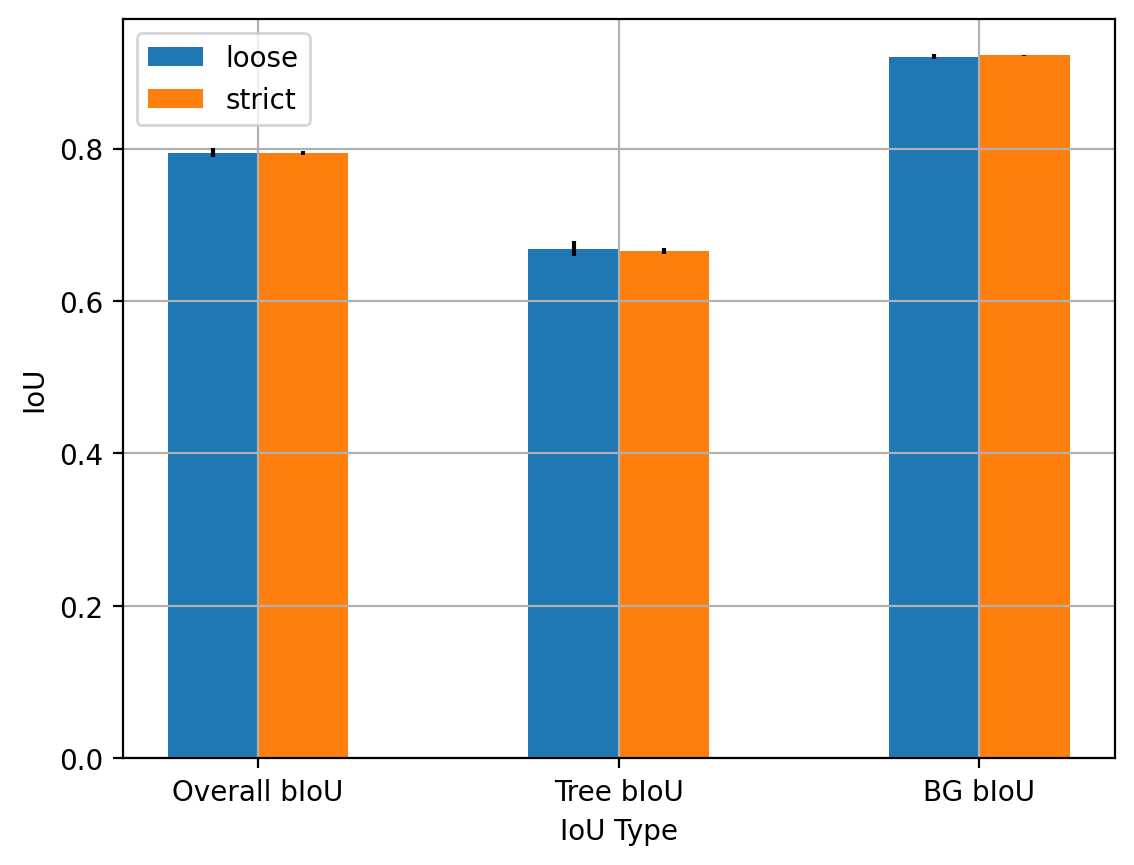

In [7]:
titles = ["Overall bIoU", "Tree bIoU", "BG bIoU"]

_, ax = plt.subplots(1, 1, dpi=200)
width = 0.25
r = np.arange(3)

ax.bar(r, loose_stats.mean(axis=0), width, label="loose", yerr=loose_stats.std(axis=0))
ax.bar(r + width, strict_stats.mean(axis=0), width, label="strict", yerr=strict_stats.std(axis=0))
ax.set_xticks(r + width/2, titles)
ax.set_xlabel("IoU Type")
ax.set_ylabel("IoU")
ax.grid()
ax.legend()

## Masked

In [4]:
data = np.load("stats/2folds_CV_masked.npy", allow_pickle=True)

In [7]:
data[0]

array([list([0.09333048015832901]), list([0.09418784081935883]),
       list([0.49185991287231445]), list([0.4933992028236389]),
       0.41160607, 0.0, 0.82321215], dtype=object)

In [ ]:
# loss = data[:, 0, 0, 3].mean(axis=0)
# val_loss = data[:, 0, 0, 4].mean(axis=0)

loss = np.zeros((10, 2, 2, 75))
val_loss = np.zeros((10, 2, 2, 75))

for i in range(loss.shape[0]):
    for j in range(loss.shape[1]):
        for k in range(loss.shape[2]):
            loss[i, j, k, :] = data[:, j, k, 3][i]
            val_loss[i, j, k, :] = data[:, j, k, 4][i]
    
epochs = range(1, loss.shape[-1] + 1)

# iou = data[:, 0, 0, 5].astype(float).mean(axis=0)
# val_iou = data[:, 0, 0, 6].astype(float).mean(axis=0)
_, ax = plt.subplots(2, 2, figsize=(18, 10), dpi=200)
# ax = ax.ravel()

for i in range(2):
    for j in range(2):
        ax[i][j].plot(epochs, loss[:, i, j, :].mean(axis=0), "y", label="Training loss")
        ax[i][j].plot(epochs, val_loss[:, i, j, :].mean(axis=0), "r", label="Validation loss")
        ax[i][j].set_title(f"Batch Size: {batch_sizes[i]}, ETA: {etas[j]}")
        ax[i][j].set_xlabel("Epochs")
        ax[i][j].set_ylabel("Loss")
        ax[i][j].legend()
        ax[i][j].set_ylim(0, 1)
    
# fg, ax = plt.subplots(1, 2, figsize=(11, 5), dpi=170)
# ax[0].plot(epochs, loss, "y", label="Training loss")
# ax[0].plot(epochs, val_loss, "r", label="Validation loss")
# ax[0].set_title("Training and validation loss")
# ax[0].set_xlabel("Epochs")
# ax[0].set_ylabel("Loss")
# ax[0].legend()

# ax[1].plot(epochs, acc, "y", label="Training acc")
# ax[1].plot(epochs, val_acc, "r", label="Validation acc")
# ax[1].set_title("Training and validation accuracy")
# ax[1].set_xlabel("Epochs")
# ax[1].set_ylabel("Accuracy")
# ax[1].legend()
plt.show()